# Лабораторная работа 3

# 1. Установка

In [1]:
!pip install torch scikit-learn matplotlib

  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 MB 21.9 MB/s  0:00:03m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 26.7 MB/s  0:00:00 eta 0:00:01
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [torch]32m3/4 [torch]kx]


# 2. Импорт библиотек

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import torch
import torch.nn as nn
import torch.optim as optim

# 3. Генерация данных

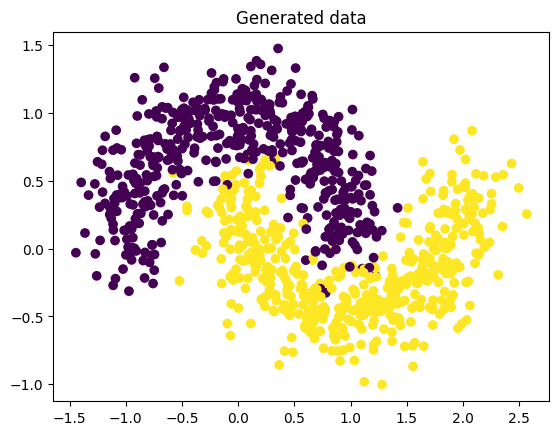

In [3]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Generated data")
plt.show()

# 4. Train/Test split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_train = torch.FloatTensor(y_train).reshape(-1,1)
y_test = torch.FloatTensor(y_test).reshape(-1,1)

# 5. Создание MLP

In [5]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.model = nn.Sequential(
            nn.Linear(2, 4),
            nn.ReLU(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

model = MLP()
print(model)

MLP(
  (model): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


# 5. Обучение

In [6]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

losses = []

epochs = 1000

for epoch in range(epochs):
    optimizer.zero_grad()
    
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    
    loss.backward()
    optimizer.step()
    
    losses.append(loss.item())

# 6. График Loss

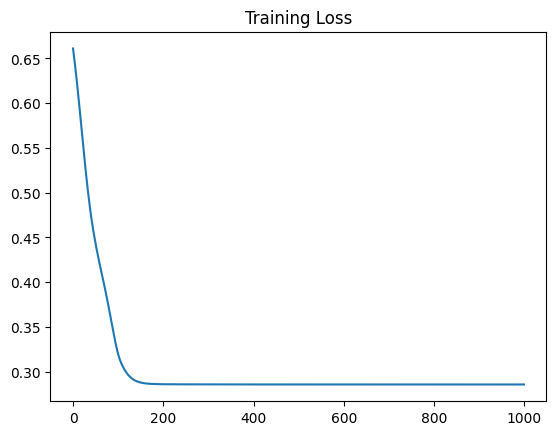

In [7]:
plt.figure()
plt.plot(losses)
plt.title("Training Loss")
plt.show()

# 7. Точность на тесте

In [8]:
with torch.no_grad():
    preds = model(X_test)
    preds = (preds > 0.5).float()

acc = accuracy_score(y_test, preds)
print("Test accuracy:", acc)

Test accuracy: 0.86


# 8. XOR

In [9]:
X_xor = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y_xor = np.array([0,1,1,0])

X_xor = torch.FloatTensor(X_xor)
y_xor = torch.FloatTensor(y_xor).reshape(-1,1)

model_xor = MLP()

optimizer = optim.Adam(model_xor.parameters(), lr=0.1)

for epoch in range(2000):
    optimizer.zero_grad()
    
    output = model_xor(X_xor)
    loss = criterion(output, y_xor)
    
    loss.backward()
    optimizer.step()

with torch.no_grad():
    print((model_xor(X_xor) > 0.5).float())

tensor([[0.],
        [0.],
        [1.],
        [0.]])
